<a href="https://colab.research.google.com/github/Srishti20022/Data-Science/blob/main/Filtering_Spam_Messages_Bayes_Naive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wordnet = WordNetLemmatizer()

In [ ]:
# reading data frame using pandas
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/OT/spam.csv', encoding='cp1252')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# deleting unwanted columns namely "Unnamed: 2	Unnamed: 3	Unnamed: 4"
df.drop(df.columns[[2,3,4]], axis = 1, inplace = True)
# renaming column as type and messages from v1 and v2
df.columns = ['type','messages']
df.head()

,type,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# describing data
df.describe()

,type,messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   type      5572 non-null   object
 1   messages  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.columns

Index(['type', 'messages'], dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


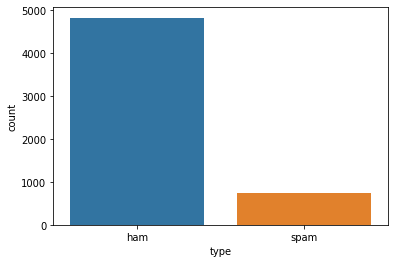

In [ ]:
sns.countplot(df['type'])

We can see the number of ham messages are more in *number*

In [ ]:
import string
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# messages['message'].head(5).apply(text_process)
# clean(training)

['typemessages']

In [ ]:
# Removing punctuations, stop words and returnig a clean message
def clean(sms):
    nopunc = [word for word in sms if word not in string.punctuation]
    nopunc = ''.join(nopunc)
    m = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return m

In [ ]:
cv = CountVectorizer(analyzer = clean).fit(df['messages'])

In [ ]:
cv

CountVectorizer(analyzer=<function clean at 0x7f24117baa70>)

In [ ]:
cvt = cv.transform(df['messages'])
cvt

<5572x11304 sparse matrix of type '<class 'numpy.int64'>'
	with 50193 stored elements in Compressed Sparse Row format>

In [ ]:
# getting middle index to split
split = int(0.5*(df.shape[0]))
print(split)

2786


In [ ]:
# first half is taken as training and second half as testing
training = df[:split]
testing = df[split:]

In [ ]:
training.shape

(2786, 2)

In [ ]:
testing.shape

(2786, 2)

In [ ]:
X_train = training['messages']
Y_train = training['type']
X_test = testing['messages']
Y_test = testing['type']

In [ ]:
Y_test

2786     ham
2787     ham
2788     ham
2789     ham
2790    spam
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: type, Length: 2786, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
tfidf_transformer = TfidfTransformer().fit(cvt)
messages_tfidf = tfidf_transformer.transform(cvt)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline

Naive bayes

In [ ]:
# creating pipeline
nbpl = Pipeline([
    ('cv', CountVectorizer(analyzer=clean)),
    ('transform', TfidfTransformer()), 
    ('alg', MultinomialNB()),
])

In [ ]:
# training
nbpl.fit(X_train,Y_train)

Pipeline(steps=[('cv',
                 CountVectorizer(analyzer=<function clean at 0x7f24117baa70>)),
                ('transform', TfidfTransformer()), ('alg', MultinomialNB())])

In [ ]:
nbpred = nbpl.predict(X_test)
nbpred
# Naive Bayes prediction

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [ ]:
count = 0  #total numbe of wrong predictions
total = 2786
for i in range (2786):
    if nbpred[i] != Y_test[2786+i]: count=count+1
count

134

In [ ]:
print("Total test cases : " + str(total))
print("Total wrong predictions : " + str(count))

Total test cases : 2786
Total wrong predictions : 134


In [ ]:
accuracy = (total-count)/total
accuracy

0.9519023689877961


 confusion matrix


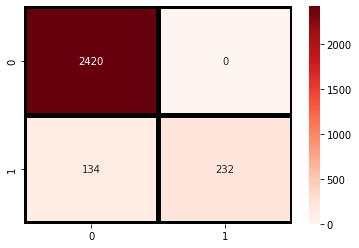

In [ ]:
print('\n confusion matrix')
sns.heatmap(confusion_matrix(Y_test,nbpred),annot=True,fmt='g',cmap='Reds',linecolor='black',linewidths=4)

In [ ]:
print(classification_report(Y_test,nbpred))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      2420
        spam       1.00      0.63      0.78       366

    accuracy                           0.95      2786
   macro avg       0.97      0.82      0.87      2786
weighted avg       0.95      0.95      0.95      2786

